In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import os
import plotly.express as px
%matplotlib inline

In [4]:
train_df = pd.read_csv('train.csv')
train_df.head(10)

,id,age,alcohol_consumption_per_week,physical_activity_minutes_per_week,diet_score,sleep_hours_per_day,screen_time_hours_per_day,bmi,waist_to_hip_ratio,systolic_bp,...,gender,ethnicity,education_level,income_level,smoking_status,employment_status,family_history_diabetes,hypertension_history,cardiovascular_history,diagnosed_diabetes
0,0,31,1,45,7.7,6.8,6.1,33.4,0.93,112,...,Female,Hispanic,Highschool,Lower-Middle,Current,Employed,0,0,0,1.0
1,1,50,2,73,5.7,6.5,5.8,23.8,0.83,120,...,Female,White,Highschool,Upper-Middle,Never,Employed,0,0,0,1.0
2,2,32,3,158,8.5,7.4,9.1,24.1,0.83,95,...,Male,Hispanic,Highschool,Lower-Middle,Never,Retired,0,0,0,0.0
3,3,54,3,77,4.6,7.0,9.2,26.6,0.83,121,...,Female,White,Highschool,Lower-Middle,Current,Employed,0,1,0,1.0
4,4,54,1,55,5.7,6.2,5.1,28.8,0.90,108,...,Male,White,Highschool,Upper-Middle,Never,Retired,0,1,0,1.0
5,5,42,1,100,4.4,6.4,5.3,25.5,0.84,111,...,Female,White,Highschool,Lower-Middle,Never,Retired,0,0,0,0.0
6,6,41,2,148,3.4,5.6,3.7,27.9,0.89,130,...,Female,White,Graduate,Lower-Middle,Current,Employed,0,0,0,1.0
7,7,51,3,102,4.0,7.3,5.5,27.1,0.83,125,...,Male,Asian,Highschool,Low,Never,Employed,1,0,0,1.0
8,8,34,2,44,2.7,7.0,7.9,22.6,0.81,120,...,Male,White,Highschool,Lower-Middle,Never,Employed,0,0,0,0.0
9,9,44,1,36,5.8,5.7,6.6,29.3,0.88,110,...,Male,Hispanic,Highschool,Middle,Never,Employed,1,0,0,1.0


In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700000 entries, 0 to 699999
Data columns (total 26 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   id                                  700000 non-null  int64  
 1   age                                 700000 non-null  int64  
 2   alcohol_consumption_per_week        700000 non-null  int64  
 3   physical_activity_minutes_per_week  700000 non-null  int64  
 4   diet_score                          700000 non-null  float64
 5   sleep_hours_per_day                 700000 non-null  float64
 6   screen_time_hours_per_day           700000 non-null  float64
 7   bmi                                 700000 non-null  float64
 8   waist_to_hip_ratio                  700000 non-null  float64
 9   systolic_bp                         700000 non-null  int64  
 10  diastolic_bp                        700000 non-null  int64  
 11  heart_rate                

In [6]:
train_df.describe()

,id,age,alcohol_consumption_per_week,physical_activity_minutes_per_week,diet_score,sleep_hours_per_day,screen_time_hours_per_day,bmi,waist_to_hip_ratio,systolic_bp,diastolic_bp,heart_rate,cholesterol_total,hdl_cholesterol,ldl_cholesterol,triglycerides,family_history_diabetes,hypertension_history,cardiovascular_history,diagnosed_diabetes
count,700000.000000,700000.000000,700000.000000,700000.000000,700000.000000,700000.000000,700000.000000,700000.000000,700000.000000,700000.000000,700000.000000,700000.000000,700000.000000,700000.000000,700000.000000,700000.000000,700000.000000,700000.000000,700000.000000,700000.000000
mean,349999.500000,50.359734,2.072411,80.230803,5.963695,7.002200,6.012733,25.874684,0.858766,116.294193,75.440924,70.167749,186.818801,53.823214,102.905854,123.081850,0.149401,0.181990,0.030324,0.623296
std,202072.738554,11.655520,1.048189,51.195071,1.463336,0.901907,2.022707,2.860705,0.037980,11.010390,6.825775,6.938722,16.730832,8.266545,19.022416,24.739397,0.356484,0.385837,0.171478,0.484560
min,0.000000,19.000000,1.000000,1.000000,0.100000,3.100000,0.600000,15.100000,0.680000,91.000000,51.000000,42.000000,117.000000,21.000000,51.000000,31.000000,0.000000,0.000000,0.000000,0.000000
25%,174999.750000,42.000000,1.000000,49.000000,5.000000,6.400000,4.600000,23.900000,0.830000,108.000000,71.000000,65.000000,175.000000,48.000000,89.000000,106.000000,0.000000,0.000000,0.000000,0.000000
50%,349999.500000,50.000000,2.000000,71.000000,6.000000,7.000000,6.000000,25.900000,0.860000,116.000000,75.000000,70.000000,187.000000,54.000000,103.000000,123.000000,0.000000,0.000000,0.000000,1.000000
75%,524999.250000,58.000000,3.000000,96.000000,7.000000,7.600000,7.400000,27.800000,0.880000,124.000000,80.000000,75.000000,199.000000,59.000000,116.000000,139.000000,0.000000,0.000000,0.000000,1.000000
max,699999.000000,89.000000,9.000000,747.000000,9.900000,9.900000,16.500000,38.400000,1.050000,163.000000,104.000000,101.000000,289.000000,90.000000,205.000000,290.000000,1.000000,1.000000,1.000000,1.000000


In [7]:
train_df.columns

Index(['id', 'age', 'alcohol_consumption_per_week',
       'physical_activity_minutes_per_week', 'diet_score',
       'sleep_hours_per_day', 'screen_time_hours_per_day', 'bmi',
       'waist_to_hip_ratio', 'systolic_bp', 'diastolic_bp', 'heart_rate',
       'cholesterol_total', 'hdl_cholesterol', 'ldl_cholesterol',
       'triglycerides', 'gender', 'ethnicity', 'education_level',
       'income_level', 'smoking_status', 'employment_status',
       'family_history_diabetes', 'hypertension_history',
       'cardiovascular_history', 'diagnosed_diabetes'],
      dtype='object')

In [8]:
test_df = pd.read_csv('test.csv')
test_df.head(10)

,id,age,alcohol_consumption_per_week,physical_activity_minutes_per_week,diet_score,sleep_hours_per_day,screen_time_hours_per_day,bmi,waist_to_hip_ratio,systolic_bp,...,triglycerides,gender,ethnicity,education_level,income_level,smoking_status,employment_status,family_history_diabetes,hypertension_history,cardiovascular_history
0,700000,45,4,100,4.3,6.8,6.2,25.5,0.84,123,...,111,Female,White,Highschool,Middle,Former,Employed,0,0,0
1,700001,35,1,87,3.5,4.6,9.0,28.6,0.88,120,...,145,Female,White,Highschool,Middle,Never,Unemployed,0,0,0
2,700002,45,1,61,7.6,6.8,7.0,28.5,0.94,112,...,184,Male,White,Highschool,Low,Never,Employed,0,0,0
3,700003,55,2,81,7.3,7.3,5.0,26.9,0.91,114,...,128,Male,White,Graduate,Middle,Former,Employed,0,0,0
4,700004,77,2,29,7.3,7.6,8.5,22.0,0.83,131,...,133,Male,White,Graduate,Low,Current,Unemployed,0,0,0
5,700005,32,1,14,4.8,7.0,9.1,25.3,0.85,111,...,83,Female,Hispanic,Graduate,Lower-Middle,Former,Employed,0,1,0
6,700006,65,2,48,3.5,8.3,7.7,30.2,0.93,117,...,98,Female,Hispanic,Graduate,Low,Current,Unemployed,0,1,0
7,700007,39,2,46,4.8,8.4,3.0,27.7,0.90,103,...,133,Female,White,Graduate,Middle,Never,Employed,1,0,0
8,700008,52,1,88,6.6,7.5,6.8,25.9,0.84,111,...,86,Male,White,Graduate,Low,Never,Employed,0,1,0
9,700009,39,1,27,3.5,6.8,5.8,28.5,0.85,119,...,89,Male,Black,Graduate,Middle,Never,Retired,0,1,0


In [9]:
train_df.isna().sum()

id                                    0
age                                   0
alcohol_consumption_per_week          0
physical_activity_minutes_per_week    0
diet_score                            0
sleep_hours_per_day                   0
screen_time_hours_per_day             0
bmi                                   0
waist_to_hip_ratio                    0
systolic_bp                           0
diastolic_bp                          0
heart_rate                            0
cholesterol_total                     0
hdl_cholesterol                       0
ldl_cholesterol                       0
triglycerides                         0
gender                                0
ethnicity                             0
education_level                       0
income_level                          0
smoking_status                        0
employment_status                     0
family_history_diabetes               0
hypertension_history                  0
cardiovascular_history                0


In [10]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, roc_curve
from sklearn.preprocessing import StandardScaler, OneHotEncoder, MinMaxScaler
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

In [11]:
train_df.columns

Index(['id', 'age', 'alcohol_consumption_per_week',
       'physical_activity_minutes_per_week', 'diet_score',
       'sleep_hours_per_day', 'screen_time_hours_per_day', 'bmi',
       'waist_to_hip_ratio', 'systolic_bp', 'diastolic_bp', 'heart_rate',
       'cholesterol_total', 'hdl_cholesterol', 'ldl_cholesterol',
       'triglycerides', 'gender', 'ethnicity', 'education_level',
       'income_level', 'smoking_status', 'employment_status',
       'family_history_diabetes', 'hypertension_history',
       'cardiovascular_history', 'diagnosed_diabetes'],
      dtype='object')

In [12]:
train_df['chol_hdl_ratio'] = train_df['cholesterol_total'] / train_df['hdl_cholesterol']
train_df['trigly_hdl_ratio'] = train_df['triglycerides'] / train_df['hdl_cholesterol']
test_df['chol_hdl_ratio'] = test_df['cholesterol_total'] / test_df['hdl_cholesterol']
test_df['trigly_hdl_ratio'] = test_df['triglycerides'] / test_df['hdl_cholesterol']
train_df['ldl_hdl_ratio'] = train_df['ldl_cholesterol'] / train_df['hdl_cholesterol']
test_df['ldl_hdl_ratio'] = test_df['ldl_cholesterol'] / test_df['hdl_cholesterol']
train_df['bmi_age_interaction'] = train_df['bmi'] * train_df['age']
test_df['bmi_age_interaction'] = test_df['bmi'] * test_df['age']
train_df['systolic_diastolic_ratio'] = train_df['systolic_bp'] / train_df['diastolic_bp']
test_df['systolic_diastolic_ratio'] = test_df['systolic_bp'] / test_df['diastolic_bp']
train_df['prehypertension'] = ((train_df['systolic_bp'] >= 120) | (train_df['diastolic_bp'] >= 80)).astype(int)
test_df['prehypertension'] = ((test_df['systolic_bp'] >= 120) | (test_df['diastolic_bp'] >= 80)).astype(int)
train_df['obese'] = (train_df['bmi'] >= 30).astype(int)
test_df['obese'] = (test_df['bmi'] >= 30).astype(int)
train_df['high_triglycerides'] = (train_df['triglycerides'] >= 150).astype(int)
test_df['high_triglycerides'] = (test_df['triglycerides'] >= 150).astype(int)
train_df['high_ldl'] = (train_df['ldl_cholesterol'] >= 130).astype(int)
test_df['high_ldl'] = (test_df['ldl_cholesterol'] >=
    130).astype(int)
train_df['low_hdl'] = (train_df['hdl_cholesterol'] < 40).astype(int)
test_df['low_hdl'] = (test_df['hdl_cholesterol'] < 40
).astype(int)
train_df['high_cholesterol'] = (train_df['cholesterol_total'] >= 200).astype(int)
test_df['high_cholesterol'] = (test_df['cholesterol_total'] >= 200).astype(int)
train_df['physical_inactivity'] = (train_df['physical_activity_minutes_per_week'] == 0).astype(int)
test_df['physical_inactivity'] = (test_df['physical_activity_minutes_per_week'] == 0).astype(int)
train_df['pulse_pressure'] = train_df['systolic_bp'] - train_df['diastolic_bp']
test_df['pulse_pressure'] = test_df['systolic_bp'] - test_df['diastolic_bp']
train_df['age_bmi_ratio'] = train_df['age'] / train_df['bmi']
test_df['age_bmi_ratio'] = test_df['age'] / test_df['bmi']
train_df['chol_trigly_ratio'] = train_df['cholesterol_total'] / train_df['triglycerides']
test_df['chol_trigly_ratio'] = test_df['cholesterol_total'] / test_df['triglycerides']
train_df['bp_age_interaction'] = (train_df['systolic_bp'] + train_df['diastolic_bp']) * train_df['age']
train_df['bp_ratio'] = train_df['systolic_bp'] / train_df['diastolic_bp']
test_df['bp_age_interaction'] = (test_df['systolic_bp'] + test_df['diastolic_bp']) * test_df['age']
test_df['bp_ratio'] = test_df['systolic_bp'] / test_df['diastolic_bp']
train_df['hypertension'] = ((train_df['systolic_bp'] >= 140) | (train_df['diastolic_bp'] >= 90)).astype(int)
test_df['hypertension'] = ((test_df['systolic_bp'] >= 140) | (test_df['diastolic_bp'] >= 90)).astype(int)
train_df['bmi_age_squared'] = train_df['bmi'] * (train_df['age'] ** 2)
test_df['bmi_age_squared'] = test_df['bmi'] * (test_df['age'] ** 2)
train_df['bmi_squared'] = train_df['bmi'] ** 2
test_df['bmi_squared'] = test_df['bmi'] ** 2
train_df['age_30_40'] = ((train_df['age'] >= 30) & (train_df['age'] < 40)).astype(int)
test_df['age_30_40'] = ((test_df['age'] >= 30) & (test_df['age'] < 40)).astype(int)
train_df['age_40_50'] = ((train_df['age'] >= 40) & (train_df['age'] < 50)).astype(int)
test_df['age_40_50'] = ((test_df['age'] >= 40) & (test_df['age'] < 50)).astype(int)
train_df['age_50_60'] = ((train_df['age'] >= 50) & (train_df['age'] < 60)).astype(int)
test_df['age_50_60'] = ((test_df['age'] >= 50) & (test_df['age'] < 60)).astype(int)
train_df['age_60_above'] = (train_df['age'] >= 60).astype(int)
test_df['age_60_above'] = (test_df['age'] >= 60).astype(int)
train_df['risk_score'] = (0.3 * train_df['bmi']) + (0.2 * train_df['age']) + (0.25 * train_df['systolic_bp']) + (0.15 * train_df['cholesterol_total']) + (0.1 * train_df['triglycerides'])
test_df['risk_score'] = (0.3 * test_df['bmi']) + (0.2 * test_df['age']) + (0.25 * test_df['systolic_bp']) + (0.15 * test_df['cholesterol_total']) + (0.1 * test_df['triglycerides'])
train_df['log_cholesterol_total'] = np.log1p(train_df['cholesterol_total'])
test_df['log_cholesterol_total'] = np.log1p(test_df['cholesterol_total'])
train_df['log_triglycerides'] = np.log1p(train_df['triglycerides'])
test_df['log_triglycerides'] = np.log1p(test_df['triglycerides'])

In [13]:
train_df.columns

Index(['id', 'age', 'alcohol_consumption_per_week',
       'physical_activity_minutes_per_week', 'diet_score',
       'sleep_hours_per_day', 'screen_time_hours_per_day', 'bmi',
       'waist_to_hip_ratio', 'systolic_bp', 'diastolic_bp', 'heart_rate',
       'cholesterol_total', 'hdl_cholesterol', 'ldl_cholesterol',
       'triglycerides', 'gender', 'ethnicity', 'education_level',
       'income_level', 'smoking_status', 'employment_status',
       'family_history_diabetes', 'hypertension_history',
       'cardiovascular_history', 'diagnosed_diabetes', 'chol_hdl_ratio',
       'trigly_hdl_ratio', 'ldl_hdl_ratio', 'bmi_age_interaction',
       'systolic_diastolic_ratio', 'prehypertension', 'obese',
       'high_triglycerides', 'high_ldl', 'low_hdl', 'high_cholesterol',
       'physical_inactivity', 'pulse_pressure', 'age_bmi_ratio',
       'chol_trigly_ratio', 'bp_age_interaction', 'bp_ratio', 'hypertension',
       'bmi_age_squared', 'bmi_squared', 'age_30_40', 'age_40_50', 'age_50_60',

In [14]:
test_df.columns

Index(['id', 'age', 'alcohol_consumption_per_week',
       'physical_activity_minutes_per_week', 'diet_score',
       'sleep_hours_per_day', 'screen_time_hours_per_day', 'bmi',
       'waist_to_hip_ratio', 'systolic_bp', 'diastolic_bp', 'heart_rate',
       'cholesterol_total', 'hdl_cholesterol', 'ldl_cholesterol',
       'triglycerides', 'gender', 'ethnicity', 'education_level',
       'income_level', 'smoking_status', 'employment_status',
       'family_history_diabetes', 'hypertension_history',
       'cardiovascular_history', 'chol_hdl_ratio', 'trigly_hdl_ratio',
       'ldl_hdl_ratio', 'bmi_age_interaction', 'systolic_diastolic_ratio',
       'prehypertension', 'obese', 'high_triglycerides', 'high_ldl', 'low_hdl',
       'high_cholesterol', 'physical_inactivity', 'pulse_pressure',
       'age_bmi_ratio', 'chol_trigly_ratio', 'bp_age_interaction', 'bp_ratio',
       'hypertension', 'bmi_age_squared', 'bmi_squared', 'age_30_40',
       'age_40_50', 'age_50_60', 'age_60_above', 'risk

In [15]:
train_df.head(10)

,id,age,alcohol_consumption_per_week,physical_activity_minutes_per_week,diet_score,sleep_hours_per_day,screen_time_hours_per_day,bmi,waist_to_hip_ratio,systolic_bp,...,hypertension,bmi_age_squared,bmi_squared,age_30_40,age_40_50,age_50_60,age_60_above,risk_score,log_cholesterol_total,log_triglycerides
0,0,31,1,45,7.7,6.8,6.1,33.4,0.93,112,...,0,32097.4,1115.56,1,0,0,0,84.27,5.298317,4.634729
1,1,50,2,73,5.7,6.5,5.8,23.8,0.83,120,...,0,59500.0,566.44,0,0,1,0,89.39,5.298317,4.828314
2,2,32,3,158,8.5,7.4,9.1,24.1,0.83,95,...,0,24678.4,580.81,1,0,0,0,76.38,5.241747,4.691348
3,3,54,3,77,4.6,7.0,9.2,26.6,0.83,121,...,0,77565.6,707.56,0,0,1,0,88.63,5.209486,4.820282
4,4,54,1,55,5.7,6.2,5.1,28.8,0.90,108,...,0,83980.8,829.44,0,0,1,0,89.74,5.332719,4.828314
5,5,42,1,100,4.4,6.4,5.3,25.5,0.84,111,...,0,44982.0,650.25,0,1,0,0,79.40,5.164786,4.564348
6,6,41,2,148,3.4,5.6,3.7,27.9,0.89,130,...,0,46899.9,778.41,0,1,0,0,87.97,5.129899,4.927254
7,7,51,3,102,4.0,7.3,5.5,27.1,0.83,125,...,0,70487.1,734.41,0,0,1,0,90.08,5.209486,4.890349
8,8,34,2,44,2.7,7.0,7.9,22.6,0.81,120,...,0,26125.6,510.76,1,0,0,0,77.73,5.099866,4.584967
9,9,44,1,36,5.8,5.7,6.6,29.3,0.88,110,...,0,56724.8,858.49,0,1,0,0,86.04,5.147494,5.036953


In [16]:
input_cols =  ['id', 'age', 'alcohol_consumption_per_week',
       'physical_activity_minutes_per_week', 'diet_score',
       'sleep_hours_per_day', 'screen_time_hours_per_day', 'bmi',
       'waist_to_hip_ratio', 'systolic_bp', 'diastolic_bp', 'heart_rate',
       'cholesterol_total', 'hdl_cholesterol', 'ldl_cholesterol',
       'triglycerides', 'gender', 'ethnicity', 'education_level',
       'income_level', 'smoking_status', 'employment_status',
       'family_history_diabetes', 'hypertension_history',
       'cardiovascular_history', 'chol_hdl_ratio', 'trigly_hdl_ratio',
       'ldl_hdl_ratio', 'bmi_age_interaction', 'systolic_diastolic_ratio',
       'prehypertension', 'obese', 'high_triglycerides', 'high_ldl', 'low_hdl',
       'high_cholesterol', 'physical_inactivity',
       'pulse_pressure', 'age_bmi_ratio', 'chol_trigly_ratio',
       'bp_age_interaction', 'bp_ratio', 'hypertension', 'bmi_age_squared',
       'bmi_squared', 'age_30_40', 'age_40_50', 'age_50_60', 'age_60_above',
       'risk_score', 'log_cholesterol_total',
       'log_triglycerides']

target_col = ['diagnosed_diabetes']

inputs = train_df[input_cols].copy()
target = train_df['diagnosed_diabetes'].copy()

test_inputs = test_df[input_cols].copy()

In [17]:
numeric_cols = ['age', 'alcohol_consumption_per_week',
       'physical_activity_minutes_per_week', 'diet_score',
       'sleep_hours_per_day', 'screen_time_hours_per_day', 'bmi',
       'waist_to_hip_ratio', 'systolic_bp', 'diastolic_bp', 'heart_rate',
       'cholesterol_total', 'hdl_cholesterol', 'ldl_cholesterol',
       'triglycerides', 'family_history_diabetes', 'hypertension_history',
       'cardiovascular_history', 'chol_hdl_ratio', 'trigly_hdl_ratio',
       'ldl_hdl_ratio', 'bmi_age_interaction', 'systolic_diastolic_ratio',
       'prehypertension', 'obese', 'high_triglycerides', 'high_ldl', 'low_hdl',
       'high_cholesterol', 'physical_inactivity',
       'pulse_pressure', 'age_bmi_ratio', 'chol_trigly_ratio',
       'bp_age_interaction', 'bp_ratio', 'hypertension', 'bmi_age_squared',
       'bmi_squared', 'age_30_40', 'age_40_50', 'age_50_60', 'age_60_above',
       'risk_score', 'log_cholesterol_total',
       'log_triglycerides']
    
categorical_cols = ['gender', 'smoking_status', 'ethnicity', 'employment_status', 'education_level',
       'income_level']


In [18]:
train_df[numeric_cols]

,age,alcohol_consumption_per_week,physical_activity_minutes_per_week,diet_score,sleep_hours_per_day,screen_time_hours_per_day,bmi,waist_to_hip_ratio,systolic_bp,diastolic_bp,...,hypertension,bmi_age_squared,bmi_squared,age_30_40,age_40_50,age_50_60,age_60_above,risk_score,log_cholesterol_total,log_triglycerides
0,31,1,45,7.7,6.8,6.1,33.4,0.93,112,70,...,0,32097.4,1115.56,1,0,0,0,84.27,5.298317,4.634729
1,50,2,73,5.7,6.5,5.8,23.8,0.83,120,77,...,0,59500.0,566.44,0,0,1,0,89.39,5.298317,4.828314
2,32,3,158,8.5,7.4,9.1,24.1,0.83,95,89,...,0,24678.4,580.81,1,0,0,0,76.38,5.241747,4.691348
3,54,3,77,4.6,7.0,9.2,26.6,0.83,121,69,...,0,77565.6,707.56,0,0,1,0,88.63,5.209486,4.820282
4,54,1,55,5.7,6.2,5.1,28.8,0.90,108,60,...,0,83980.8,829.44,0,0,1,0,89.74,5.332719,4.828314
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
699995,29,1,59,6.9,5.2,1.5,26.1,0.88,133,57,...,0,21950.1,681.21,0,0,0,0,83.93,5.099866,4.844187
699996,46,2,72,7.7,7.7,3.8,25.5,0.85,106,85,...,0,53958.0,650.25,0,1,0,0,83.45,5.241747,4.787492
699997,35,1,50,5.6,6.1,6.4,26.9,0.88,127,84,...,0,32952.5,723.61,1,0,0,0,88.62,5.129899,5.117994
699998,49,2,70,5.7,6.9,4.7,25.2,0.86,116,67,...,0,60505.2,635.04,0,1,0,0,89.36,5.293305,4.897840


In [19]:
encoder = OneHotEncoder(sparse_output=False)
encoder.fit(inputs[categorical_cols])
encoded_cols = list(encoder.get_feature_names_out(categorical_cols))
inputs[encoded_cols] = encoder.transform(inputs[categorical_cols])
test_inputs[encoded_cols] = encoder.transform(test_inputs[categorical_cols])

In [20]:
inputs.columns

Index(['id', 'age', 'alcohol_consumption_per_week',
       'physical_activity_minutes_per_week', 'diet_score',
       'sleep_hours_per_day', 'screen_time_hours_per_day', 'bmi',
       'waist_to_hip_ratio', 'systolic_bp', 'diastolic_bp', 'heart_rate',
       'cholesterol_total', 'hdl_cholesterol', 'ldl_cholesterol',
       'triglycerides', 'gender', 'ethnicity', 'education_level',
       'income_level', 'smoking_status', 'employment_status',
       'family_history_diabetes', 'hypertension_history',
       'cardiovascular_history', 'chol_hdl_ratio', 'trigly_hdl_ratio',
       'ldl_hdl_ratio', 'bmi_age_interaction', 'systolic_diastolic_ratio',
       'prehypertension', 'obese', 'high_triglycerides', 'high_ldl', 'low_hdl',
       'high_cholesterol', 'physical_inactivity', 'pulse_pressure',
       'age_bmi_ratio', 'chol_trigly_ratio', 'bp_age_interaction', 'bp_ratio',
       'hypertension', 'bmi_age_squared', 'bmi_squared', 'age_30_40',
       'age_40_50', 'age_50_60', 'age_60_above', 'risk

In [21]:
scaler = StandardScaler()
scaler.fit(inputs[numeric_cols])

,copy,True
,with_mean,True
,with_std,True


In [22]:
inputs[numeric_cols] = scaler.transform(inputs[numeric_cols])
test_inputs[numeric_cols] = scaler.transform(test_inputs[numeric_cols])

In [23]:
inputs.drop(columns=categorical_cols, inplace=True)
test_inputs.drop(columns=categorical_cols, inplace=True)

In [24]:
def submit_predictions(model, test_inputs, filename='submission.csv'):
    test_preds = model.predict_proba(test_inputs)[:, 1]
    submission_df = pd.DataFrame({
        'id': test_df['id'],
        'diagnosed_diabetes_probability': test_preds
    })
    submission_df.to_csv(filename, index=False)
    print(f'Submission file "{filename}" created.')

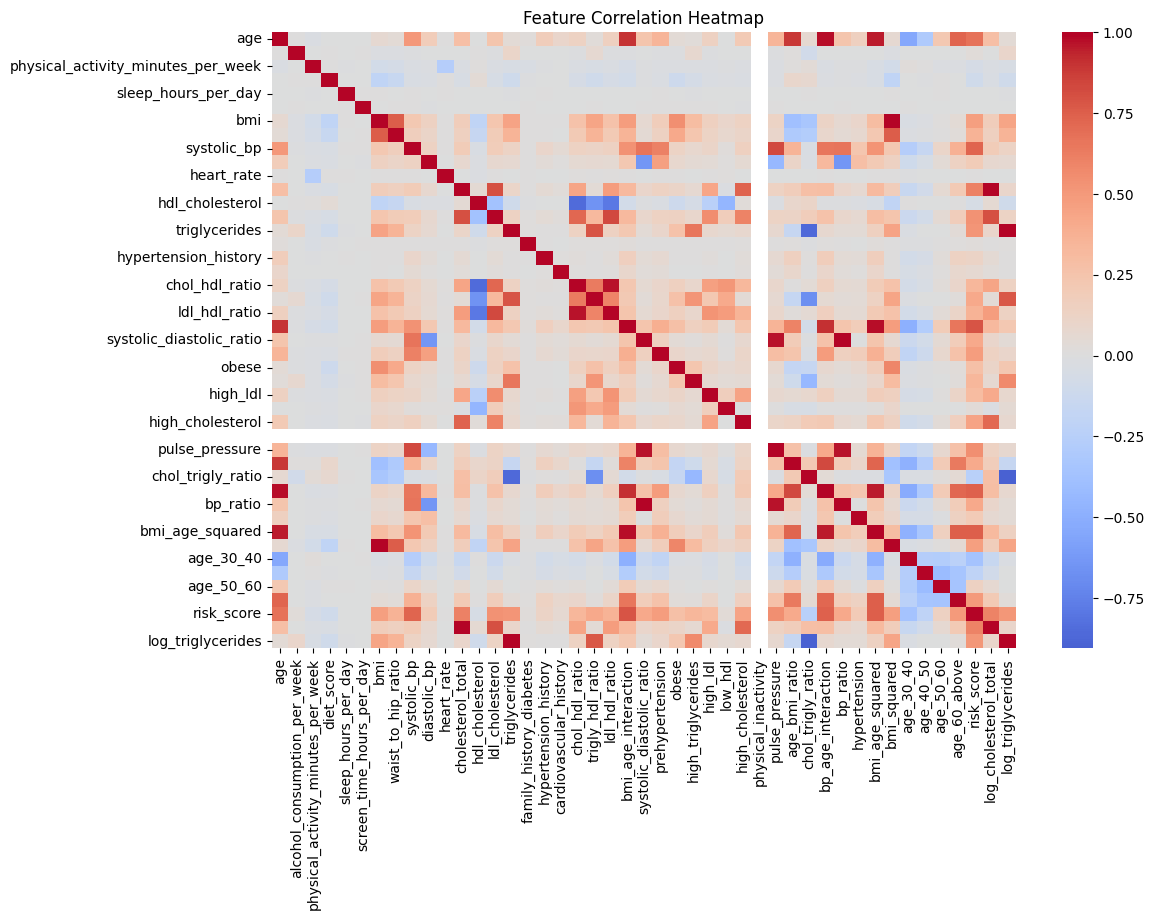

In [25]:
corr = train_df[numeric_cols].corr()

plt.figure(figsize=(12,8))
sns.heatmap(corr, cmap="coolwarm", center=0)
plt.title("Feature Correlation Heatmap")
plt.show()

In [26]:
from lightgbm import LGBMClassifier

model = LGBMClassifier(
    n_estimators=1200,
    learning_rate=0.015,
    num_leaves=48,
    max_depth=-1,
    subsample=0.8,
    colsample_bytree=0.8,
    min_child_samples=40,
    reg_alpha=0.4,
    reg_lambda=1.2,
    objective="binary",
    random_state=42,
    n_jobs=-1
)

model.fit(inputs, target)
submit_predictions(model, test_inputs)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 436307, number of negative: 263693
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.074507 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5414
[LightGBM] [Info] Number of data points in the train set: 700000, number of used features: 69
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.623296 -> initscore=0.503561
[LightGBM] [Info] Start training from score 0.503561
Submission file "submission.csv" created.


In [27]:
import pandas as pd
imp = pd.DataFrame({
    'feature': inputs.columns,
    'importance': model.feature_importances_
}).sort_values(by='importance', ascending=True)

imp

,feature,importance
30,physical_inactivity,0
29,high_cholesterol,1
28,low_hdl,4
42,age_60_above,4
26,high_triglycerides,5
...,...,...
11,heart_rate,1943
7,bmi,1946
12,cholesterol_total,1968
15,triglycerides,4425


In [28]:
drop_n = int(0.3 * len(imp))
drop_features = imp.head(drop_n)['feature'].tolist()

inputs_pruned = inputs.drop(columns=drop_features)
test_inputs_pruned = test_inputs.drop(columns=drop_features)